In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Other umports
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from scipy.stats import lognorm, loguniform, randint


from sklearn.preprocessing import StandardScaler


# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve

# imports

from sklearn.compose import ColumnTransformer, make_column_transformer


In [2]:
# read the processed data

X_train = pd.read_csv('../processed/X_train.csv').drop(['Unnamed: 0'], axis = 1)
X_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,age_risk,bp_risk,hdl_risk,ldl_risk,tg_risk,anemic_risk,creatinine_cat,gtp_cat,ast_cat,alt_cat
0,35,170,65,95.0,1.0,1.5,1,1,126,65,...,low risk,elevated,low risk,normal,normal,low risk,normal,high,normal,low
1,40,165,55,74.0,1.0,0.9,1,1,103,71,...,low risk,normal,normal,normal,normal,low risk,normal,normal,normal,low
2,55,155,65,79.0,0.7,0.6,1,1,133,83,...,high risk,high_lvl1,normal,normal,moderate_risk,low risk,low,normal,normal,low
3,60,150,55,77.0,0.8,1.0,1,1,150,80,...,high risk,high_lvl2,normal,normal,normal,low risk,low,normal,normal,low
4,60,165,90,101.0,0.8,0.8,1,1,120,75,...,high risk,elevated,high risk,normal,moderate_risk,low risk,normal,normal,normal,high


In [3]:
all_features = list(X_train.columns)
all_features

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'male_probability',
 'bmi',
 'bmi_category',
 'obesity_risk',
 'age_risk',
 'bp_risk',
 'hdl_risk',
 'ldl_risk',
 'tg_risk',
 'anemic_risk',
 'creatinine_cat',
 'gtp_cat',
 'ast_cat',
 'alt_cat']

In [4]:
drop_features = []
categorical_features = ['hearing(left)', 'hearing(right)']
ordinal_features = [ 'bmi_category',
 'obesity_risk',
 'age_risk',
 'bp_risk',
 'hdl_risk',
 'ldl_risk',
 'tg_risk',
 'anemic_risk',
 'creatinine_cat',
 'gtp_cat',
 'ast_cat',
 'alt_cat']
numerical_features = list(set(all_features) - set(drop_features) - set(ordinal_features) - set(categorical_features)) 

## Column transformations

In [10]:
# any missing values?

X_train.isnull().sum()

# no missing values and hence no imputation needed in the transformers

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
male_probability       0
bmi                    0
bmi_category           0
obesity_risk           0
age_risk               0
bp_risk                0
hdl_risk               0
ldl_risk               0
tg_risk                0
anemic_risk            0
creatinine_cat         0
gtp_cat                0
ast_cat                0
alt_cat                0
dtype: int64

In [11]:
# Establising the ordering for each of the ordinal columns

ordinal_features

['bmi_category',
 'obesity_risk',
 'age_risk',
 'bp_risk',
 'hdl_risk',
 'ldl_risk',
 'tg_risk',
 'anemic_risk',
 'creatinine_cat',
 'gtp_cat',
 'ast_cat',
 'alt_cat']

In [12]:
ordinal_order=[
    ['Underweight', 'Normal', 'Overweight', 'Obese-lvl1','Obese-lvl2', 'Obese-lvl3'],
    ['low risk', 'high risk', 'very high risk'],
    ['low risk', 'high risk'],
    ['normal', 'elevated', 'high_lvl1', 'high_lvl2', 'high_lvl3'],
    ['low risk', 'normal', 'high risk'],
    ['optimal', 'normal', 'high_lvl1', 'high_lvl2', 'high_lvl3'],
    ['normal', 'moderate_risk', 'high_risk', 'very_high_risk'],
    ['low risk', 'high risk'],
    ['low','normal', 'high'],
    ['low','normal', 'high'],
    ['low','normal', 'high'],
    ['low','normal', 'high']
]

In [14]:
numeric_transformer = make_pipeline(StandardScaler())

ordinal_transformer_reg = make_pipeline(
    OrdinalEncoder(categories=ordinal_order),
)

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numerical_features),
    (ordinal_transformer_reg, ordinal_features),
    (categorical_transformer, categorical_features),
)

In [15]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('drop', 'drop', []),
                                ('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['systolic', 'Urine protein', 'age', 'AST',
                                  'LDL', 'Gtp', 'height(cm)',
                                  'fasting blood sugar', 'eyesight(right)',
                                  'male_probability', 'eyesight(left)', 'HDL',
                                  'hemoglobin', 'waist(cm)', 'relaxation',
                                  'dental caries', 'Cholesterol',
                                  'triglyceride', 'ALT'...
                                                                              'normal',
                                                                              'high'],
                                                                             ['low',
                                                                              'normal',
                                                                              'high'],
                                                                             ['low',
                                                                              'normal',
                                                                              'high']]))]),
                                 ['bmi_category', 'obesity_risk', 'age_risk',
                                  'bp_risk', 'hdl_risk', 'ldl_risk', 'tg_risk',
                                  'anemic_risk', 'creatinine_cat', 'gtp_cat',
                                  'ast_cat', 'alt_cat']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['hearing(left)', 'hearing(right)'])])

In [16]:
preprocessor.named_transformers_

{'drop': 'drop',
 'pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['Underweight', 'Normal',
                                              'Overweight', 'Obese-lvl1',
                                              'Obese-lvl2', 'Obese-lvl3'],
                                             ['low risk', 'high risk',
                                              'very high risk'],
                                             ['low risk', 'high risk'],
                                             ['normal', 'elevated', 'high_lvl1',
                                              'high_lvl2', 'high_lvl3'],
                                             ['low risk', 'normal', 'high risk'],
                                             ['optimal', 'normal', 'high_lvl1',
                                              'high_lvl2', 'high_lvl3'],
                                             

In [25]:
preprocessor.get_feature_names_out()

array(['pipeline-1__systolic', 'pipeline-1__Urine protein',
       'pipeline-1__age', 'pipeline-1__AST', 'pipeline-1__LDL',
       'pipeline-1__Gtp', 'pipeline-1__height(cm)',
       'pipeline-1__fasting blood sugar', 'pipeline-1__eyesight(right)',
       'pipeline-1__male_probability', 'pipeline-1__eyesight(left)',
       'pipeline-1__HDL', 'pipeline-1__hemoglobin',
       'pipeline-1__waist(cm)', 'pipeline-1__relaxation',
       'pipeline-1__dental caries', 'pipeline-1__Cholesterol',
       'pipeline-1__triglyceride', 'pipeline-1__ALT',
       'pipeline-1__serum creatinine', 'pipeline-1__weight(kg)',
       'pipeline-1__bmi', 'pipeline-2__bmi_category',
       'pipeline-2__obesity_risk', 'pipeline-2__age_risk',
       'pipeline-2__bp_risk', 'pipeline-2__hdl_risk',
       'pipeline-2__ldl_risk', 'pipeline-2__tg_risk',
       'pipeline-2__anemic_risk', 'pipeline-2__creatinine_cat',
       'pipeline-2__gtp_cat', 'pipeline-2__ast_cat',
       'pipeline-2__alt_cat', 'pipeline-3__hearing(l

In [26]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)

C:\Users\ranji\miniconda3\envs\573\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
ohe_columns

['hearing(left)_1', 'hearing(left)_2', 'hearing(right)_1', 'hearing(right)_2']

In [28]:
new_columns = (
    numerical_features + ordinal_features + ohe_columns
)

In [29]:
new_columns

['systolic',
 'Urine protein',
 'age',
 'AST',
 'LDL',
 'Gtp',
 'height(cm)',
 'fasting blood sugar',
 'eyesight(right)',
 'male_probability',
 'eyesight(left)',
 'HDL',
 'hemoglobin',
 'waist(cm)',
 'relaxation',
 'dental caries',
 'Cholesterol',
 'triglyceride',
 'ALT',
 'serum creatinine',
 'weight(kg)',
 'bmi',
 'bmi_category',
 'obesity_risk',
 'age_risk',
 'bp_risk',
 'hdl_risk',
 'ldl_risk',
 'tg_risk',
 'anemic_risk',
 'creatinine_cat',
 'gtp_cat',
 'ast_cat',
 'alt_cat',
 'hearing(left)_1',
 'hearing(left)_2',
 'hearing(right)_1',
 'hearing(right)_2']

In [21]:
# It is impportant to transform the dataset and ensure the new encoded columns are in alignment

In [30]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,systolic,Urine protein,age,AST,LDL,Gtp,height(cm),fasting blood sugar,eyesight(right),male_probability,...,tg_risk,anemic_risk,creatinine_cat,gtp_cat,ast_cat,alt_cat,hearing(left)_1,hearing(left)_2,hearing(right)_1,hearing(right)_2
0,0.275554,-0.214904,-0.785625,-1.000029,-0.125475,0.732281,0.536615,0.630878,1.281540,0.708777,...,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.532729,-0.214904,-0.363735,-0.159110,-0.090142,0.057392,-0.029593,1.284615,-0.258835,0.662361,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.825902,-0.214904,0.901935,0.681808,0.333858,-0.810323,-1.162009,-0.938090,-1.029022,-1.516128,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2.162459,-0.214904,1.323825,-0.579570,-0.514142,-0.681772,-1.728217,-0.611222,-0.002106,-1.510687,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.196172,-0.214904,1.323825,0.576694,-0.372809,-0.103296,-0.029593,1.415363,-0.515564,0.706074,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0


## LGBM model pipeline

In [31]:
y_train = pd.read_csv('../processed/y_train.csv').drop(['Unnamed: 0'], axis = 1)

In [32]:
pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123)
)

param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    "lgbmclassifier__max_depth": randint(2, 20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=123,
    return_train_score=True,
)



In [36]:
random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\ranji\miniconda3\envs\573\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ranji\miniconda3\envs\573\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               []),
                                                                              ('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['systolic',
                                                                                'Urine '
                                                                                'protein',
                                                                                'age',
                                                                                'AST',
                                                                                'LDL',
                                                                                'Gtp',
                                                                                'height(cm)',
                                                                                'fasting '
                                                                                'blood '
                                                                                'sugar',
                                                                                'eyesight(right)',
                                                                                'male_probability',
                                                                                'eyesight(left)',
                                                                                'HDL',
                                                                                'hemoglobin',
                                                                                'w...
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002686AA23D30>,
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000268734E5F00>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [37]:
# utility function to report the best results from
# Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [38]:
report(random_search_lgbm.cv_results_)

Model with rank: 1
Mean validation score: 0.865 (std: 0.001)
Parameters: {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 8, 'lgbmclassifier__n_estimators': 95, 'lgbmclassifier__subsample': 1}

Model with rank: 2
Mean validation score: 0.865 (std: 0.001)
Parameters: {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 9, 'lgbmclassifier__n_estimators': 98, 'lgbmclassifier__subsample': 1}

Model with rank: 3
Mean validation score: 0.865 (std: 0.001)
Parameters: {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 19, 'lgbmclassifier__n_estimators': 96, 'lgbmclassifier__subsample': 0.75}



In [39]:
random_search_lgbm.best_params_

{'lgbmclassifier__learning_rate': 0.1,
 'lgbmclassifier__max_depth': 8,
 'lgbmclassifier__n_estimators': 95,
 'lgbmclassifier__subsample': 1}

In [40]:
random_search_lgbm.best_score_

0.8652344314273035

In [41]:
best_lgbm = random_search_lgbm.best_estimator_

In [42]:
# Read the test data and make predictions to check the performance

X_test = pd.read_csv('../processed/X_test.csv').drop(['Unnamed: 0'], axis = 1)
y_test = pd.read_csv('../processed/y_test.csv').drop(['Unnamed: 0'], axis = 1)

In [43]:
X_test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,age_risk,bp_risk,hdl_risk,ldl_risk,tg_risk,anemic_risk,creatinine_cat,gtp_cat,ast_cat,alt_cat
0,50,170,85,95.0,0.8,0.8,1,1,136,88,...,high risk,high_lvl1,low risk,optimal,normal,low risk,normal,high,high,high
1,40,160,55,65.0,0.6,0.8,1,1,100,65,...,low risk,normal,normal,high_lvl1,normal,high risk,normal,normal,normal,low
2,50,155,55,73.0,1.0,0.8,1,1,108,68,...,high risk,normal,low risk,optimal,normal,low risk,normal,normal,normal,low
3,40,175,80,91.0,1.0,1.2,1,1,120,80,...,low risk,elevated,normal,high_lvl2,normal,low risk,normal,high,normal,high
4,40,170,70,84.0,1.2,1.2,1,1,116,78,...,low risk,normal,high risk,normal,high_risk,low risk,normal,high,normal,high


In [44]:
pred = best_lgbm.predict(X_test)

In [50]:
pred_proba = best_lgbm.predict_proba(X_test)[:,1]

In [53]:
pred_proba

array([0.73390522, 0.01130257, 0.04300456, ..., 0.02031553, 0.03493959,
       0.49843617])

In [56]:
# Getting the roc_auc score on the predictions

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba)

0.8636805408065089

In [58]:
# plotting the roc curve

# utility function from
# https://stats.stackexchange.com/questions/123124/how-to-determine-the-optimal-threshold-for-a-classifier-and-generate-roc-curve

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



In [61]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, pred_proba))

[0.00000000e+00 7.16897269e-05 1.50548426e-03 ... 9.99928310e-01
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.         ... 0.98698542 0.98698542 1.        ]
[1.96279469 0.96279469 0.94194861 ... 0.00616361 0.00614621 0.00302882]
0.8636805408065089


Threshold value is: 0.4539349961873041


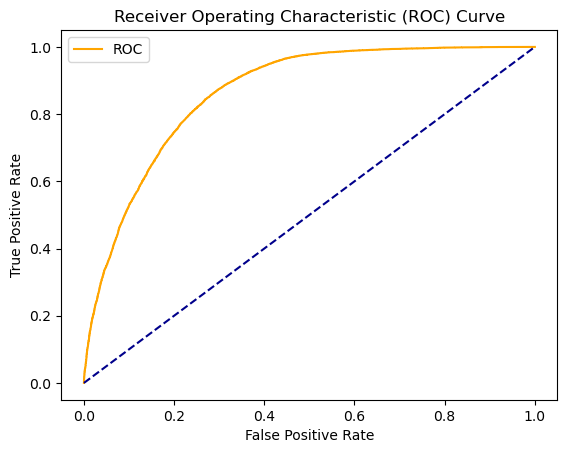

In [62]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [70]:
# exporting the model to a pickle file

import pickle

In [72]:
# save the model to disk
path = '../saved_models'
if not os.path.exists(path):
    os.makedirs(path)

filename = 'lgbm_model.sav'
pickle.dump(best_lgbm, open(path+'/'+filename, 'wb'))